In [15]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

%matplotlib inline

In [23]:
# Load different datasets

amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t', header=None)
yelp = pd.read_csv('yelp_labelled.txt', delimiter='\t', header=None)
imdb = pd.read_csv('imdb_labelled.txt', delimiter='\t', header=None)

In [24]:
# Key words for a negative review based off of most used words
keywords = ['bad', 'terrible', 'no', 'died', 'disappointed', 'not', "don't", "doesn't", 'waste', 'worst',
       'poor', 'few', 'worst', 'never', 'stupid', 'awful', 'worse', 'poor', 'problem', 'fail',
           'useless', 'broke', 'problems', 'broken', ]


In [25]:
# Function that will produce a heatmap and test the model?
def analysis(dataset):
    
    # give columns names
    dataset.columns = ['message', 'rating']

    # check to see if keywords are in message
    for key in keywords:
        dataset[str(key)] = dataset.message.str.contains(' ' + str(key) + ' ', case=False)
    
    # Change rating to a Boolean 
    dataset['rating'] = (dataset['rating'] == 0)

    # generate heatmap
    sns.set_style('darkgrid')
    plt.figure(figsize=(15,10))
    sns.heatmap(dataset.corr())
    plt.show()
    
    # separate data into testing and training 
    data = dataset[keywords]
    target = dataset['rating']
    
    # Run BernoulliNB
    print()
    print('Bernoulli NB')
    bnb = BernoulliNB()
    bnb.fit(data, target)
    y_pred = bnb.predict(data)
    print('Number of mislabeled points out of a total {} points: {}'.format(
        data.shape[0],
        (target != y_pred).sum()
    ))
    
    print('Accuracy score:', metrics.accuracy_score(target, y_pred))
    
    # run MultinomialNB
    print()
    print('Multinomial NB')
    multi = MultinomialNB()
    multi.fit(data, target)
    y_pred = multi.predict(data)
    print('Number of mislabeled points out of a total {} points: {}'.format(
        data.shape[0],
        (target != y_pred).sum()
    ))
    
    print('Accuracy score:', metrics.accuracy_score(target, y_pred))
    
    # Run GaussianNB
    print()
    print('Gaussian NB')
    gaus = GaussianNB()
    gaus.fit(data, target)
    y_pred = gaus.predict(data)
    print('Number of mislabeled points out of a total {} points: {}'.format(
        data.shape[0],
        (target != y_pred).sum()
    ))
    
    print('Accuracy score:', metrics.accuracy_score(target, y_pred))
    



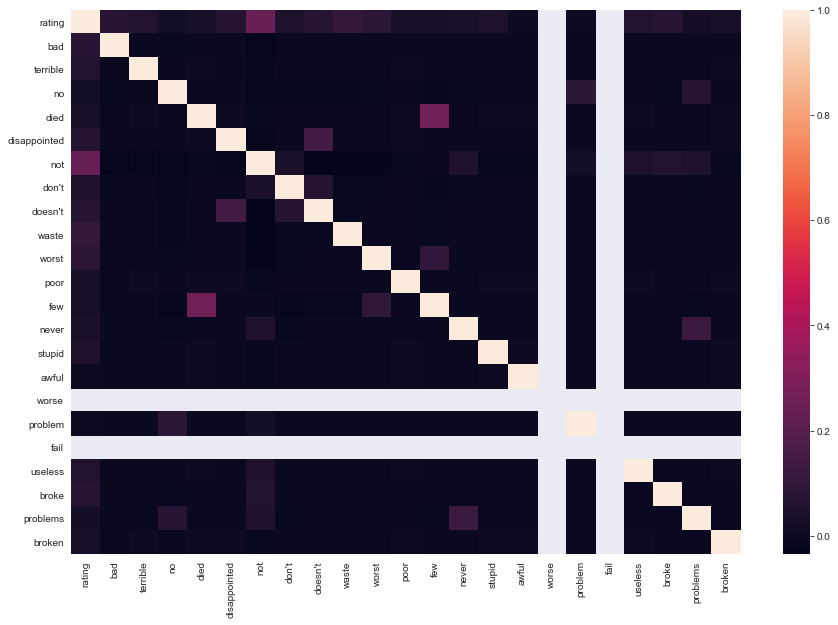


Bernoulli NB
Number of mislabeled points out of a total 1000 points: 373
Accuracy score: 0.627

Multinomial NB
Number of mislabeled points out of a total 1000 points: 384
Accuracy score: 0.616

Gaussian NB
Number of mislabeled points out of a total 1000 points: 456
Accuracy score: 0.544


In [26]:
analysis(amazon)

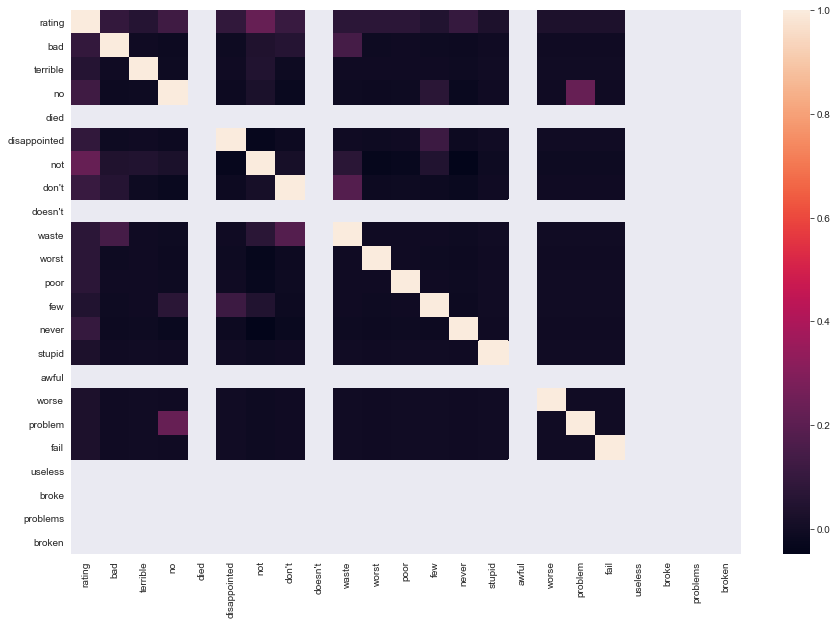


Bernoulli NB
Number of mislabeled points out of a total 1000 points: 356
Accuracy score: 0.644

Multinomial NB
Number of mislabeled points out of a total 1000 points: 364
Accuracy score: 0.636

Gaussian NB
Number of mislabeled points out of a total 1000 points: 444
Accuracy score: 0.556


In [27]:
analysis(yelp)

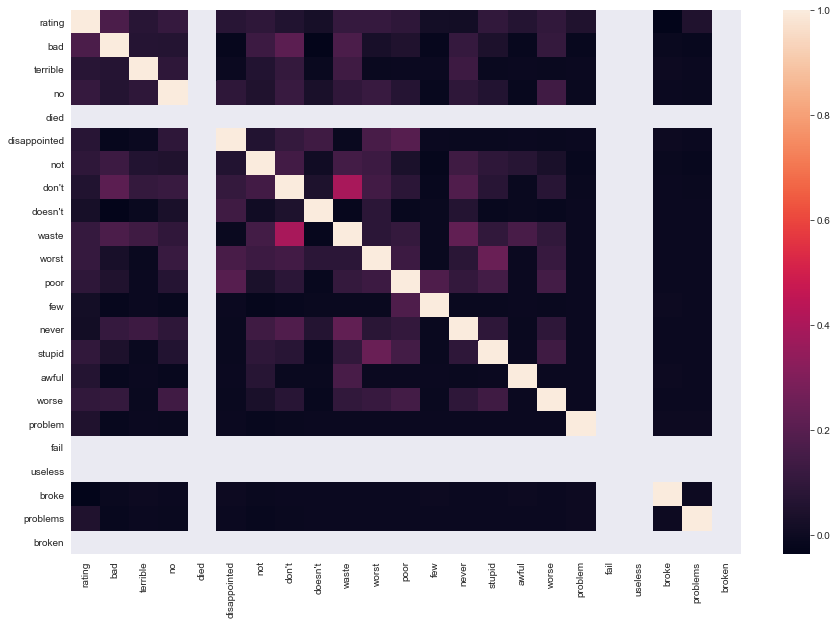


Bernoulli NB
Number of mislabeled points out of a total 748 points: 274
Accuracy score: 0.6336898395721925

Multinomial NB
Number of mislabeled points out of a total 748 points: 288
Accuracy score: 0.6149732620320856

Gaussian NB
Number of mislabeled points out of a total 748 points: 317
Accuracy score: 0.5762032085561497


In [28]:
analysis(imdb)